In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename the columns, easy for the future analysis
df.rename(columns={'Annual Income (k$)' : 'Annual_Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Check descriptive statistics and plot correlation
df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


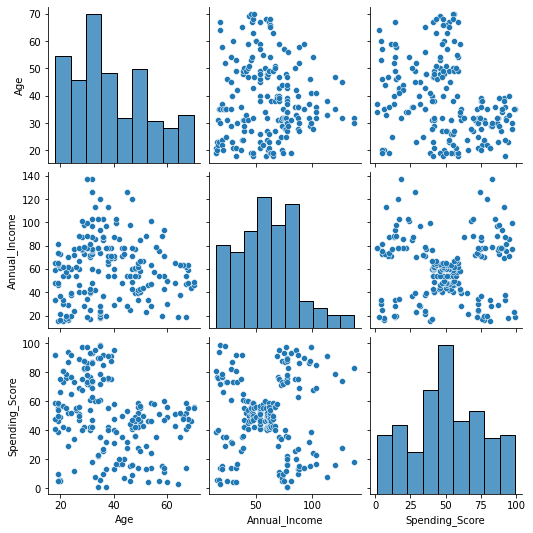

In [5]:
sns.pairplot(df[['Age', 'Annual_Income', 'Spending_Score']])

In [6]:
# import sklearn and perform K-mean clustering 
import sklearn.cluster as cluster

In [7]:
kmeans = cluster.KMeans(n_clusters=5, init="k-means++") # 5 cluster based on the spending_score and Annual_income 

In [8]:
kmeans = kmeans.fit(df[['Spending_Score', 'Annual_Income']])

In [9]:
kmeans.cluster_centers_ # this give the 5 cluster center

array([[20.91304348, 26.30434783],
       [49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

In [10]:
# attach the cluster back to the original data
df['Cluster']= kmeans.labels_ # create a new column with cluster
df.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


In [11]:
df['Cluster'].value_counts() # count the custermer that belong to certain clusters

1    81
2    39
4    35
0    23
3    22
Name: Cluster, dtype: int64

<AxesSubplot:xlabel='Spending_Score', ylabel='Annual_Income'>

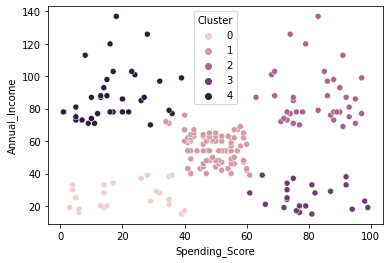

In [12]:
# Plot cluster and export the cluster data
sns.scatterplot(x="Spending_Score", y="Annual_Income", hue='Cluster', data=df)

In [13]:
df.to_csv('mallClusters.csv', index = False)